### 集成学习
- 集成学习(ensemble learning)是时下非常流行的机器学习算法，它本身不是一个单独的机器学习算法，而是通 过在数据上构建多个模型，集成所有模型的建模结果。
- 集成算法的目标
    - 集成算法会考虑多个评估器的建模结果，汇总之后得到一个综合的结果，以此来获取比单个模型更好的回归或分类表现。
- 或者说在机器学习的众多算法中，我们的目标是学习出一个稳定的且在各个方面表现都较好的模型，但实际情况往往不这么理想，有时我们只能得到多个有偏好的模型（弱监督模型（弱评估器，基评估器），在某些方面表现的比较好）。集成学习就是组合这里的多个弱监督模型一起得到一个更好更全面的强监督模型。（三个臭皮匠赛过诸葛亮）
    - 集成学习潜在的思想是即便某一个弱评估器得到了错误的预测，其他的弱评估器也可以将错误纠正回来。


- 集成学习就是将多个弱学习器集合成一个强学习器，你可以理解成现在有一些判断题（判断对错即01），如果让学霸去做这些题，可能没啥问题，几乎全部都能做对，但是现实情况是学霸不常有，学渣倒是很多，学渣做题怎么样做才能保证题做对的准确率较高呢？就是让多个学渣一起做， 每个人随机挑选一部分题目来做（每人挑的题目会有重复的），最后将所有人的结果进行汇总，然后进行投票根据将票多者作为最后的结果；另一种方式就是先让学渣A做一遍，然后再让学渣B做，且让B重点关注A做错的那些题，再让C做，同样重点关注B做错的，依次循环，直到所有的学渣都把题目做了一遍为止。通过上面两种方式就可以做到学渣也能取得和学霸一样的成绩啦。我们把这种若干个学渣组合达到学霸效果的这种方式称为集成学习。

- 实现集成学习的方法可以分为两类：
    - 并行集成方法（装袋法Bagging）：
        - 其中参与训练的基础学习器并行生成（例如 Random Forest）。并行方法的原理是利用基础学习器之间的独立性，通过平均或者投票的方式可以显著降低错误。
        - 多个学渣一起做， 每个人随机挑选一部分题目来做，最后将所有人的结果进行汇总，然后根据将票多者作为最后的结果
    - 序列集成方法（提升法Boosting）：
        - 其中参与训练的基础学习器按照顺序生成（例如 AdaBoost）。序列方法的原理是利用基础学习器之间的依赖关系。通过对之前训练中错误标记的样本赋值较高的权重，可以提高整体的预测效果。
        - 先让学渣A做一遍，然后再让学渣B做，且让B重点关注A做错的那些题，再让C做，同样重点关注B做错的，依次循环，直到所有的学渣都把题目做了一遍为止
    

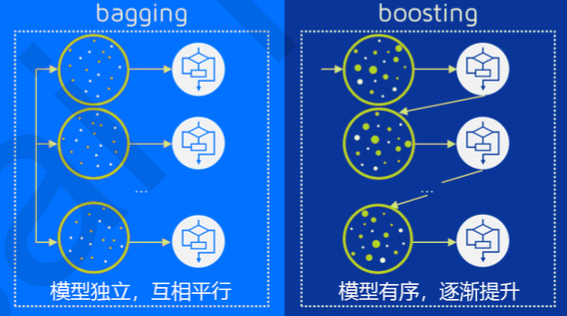

- 实现集成学习的方法有：
    - Bagging
    - Boosting
    - Stacking

#### Bagging套袋法
- 全称为bootstrap aggregating。它是一种有放回的抽样方法，其算法过程如下：
    - 从原始样本集中抽取训练集。每轮从原始样本集中使用有放回的方法抽取n个训练样本（在训练集中，有些样本可能被多次抽取到，而有些样本可能一次都没有被抽中）。共进行k轮抽取，得到k个训练集。（k个训练集之间是相互独立的）
    - 每次使用一个训练集得到一个模型，k个训练集共得到k个模型。（注：这里并没有具体的分类算法或回归方法，我们可以根据具体问题采用不同的分类或回归方法，如决策树、感知器等）
    - 对分类问题：将上步得到的k个模型采用投票的方式得到分类结果；对回归问题，计算上述模型的均值作为最后的结果。（所有模型的重要性相同）
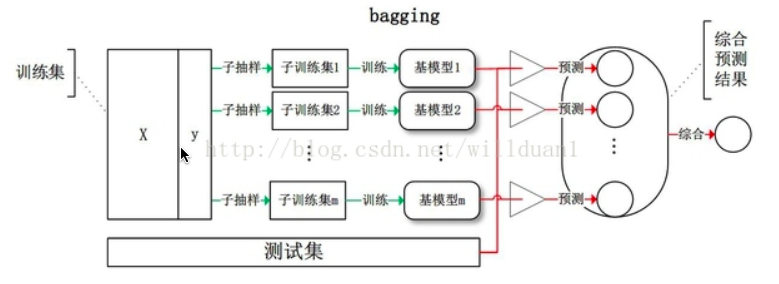    

#### Boosting
- 其主要思想是将弱学习器组装成一个强学习器。
- 关于Boosting的核心思想：
    - 通过提高那些在前一轮被弱分类器分错样例的权值，减小前一轮分对样例的权值（使得弱分类器可以对分错样例更敏感），来使得分类器对误分的数据有较好的效果。
    - 也就是说算法刚开始训练时对每一个训练样本赋相等的权重，然后用该算法对训练集训练t轮，每次训练后，对训练失败的训练例赋以较大的权重，也就是让学习算法在每次学习以后更注意学错的样本。然后获取t轮返回的结果，融合制定出终极结果！

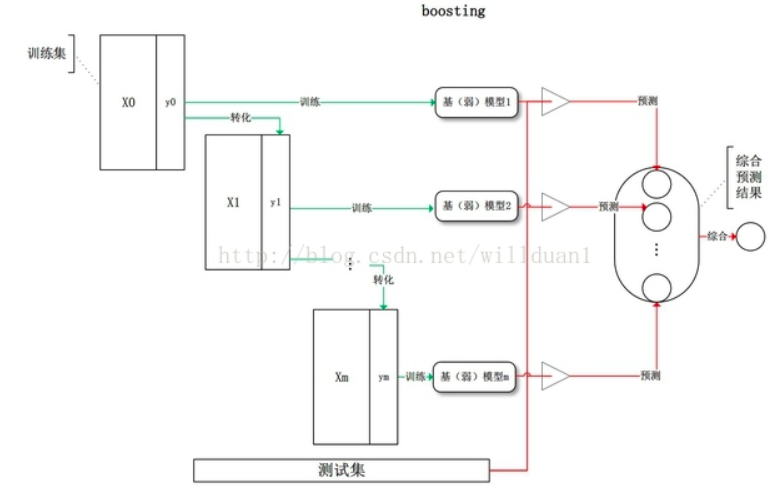

#### Stacking
- Stacking方法是指训练一个模型用于组合其他各个模型。首先我们先训练多个不同的模型，然后把之前训练的各个模型的输出为输入来训练一个模型，以得到一个最终的输出。
- 如下图，先在整个训练数据集上通过有放回抽样得到各个训练集合，得到一系列分类模型，然后将输出用于训练第二层分类器。
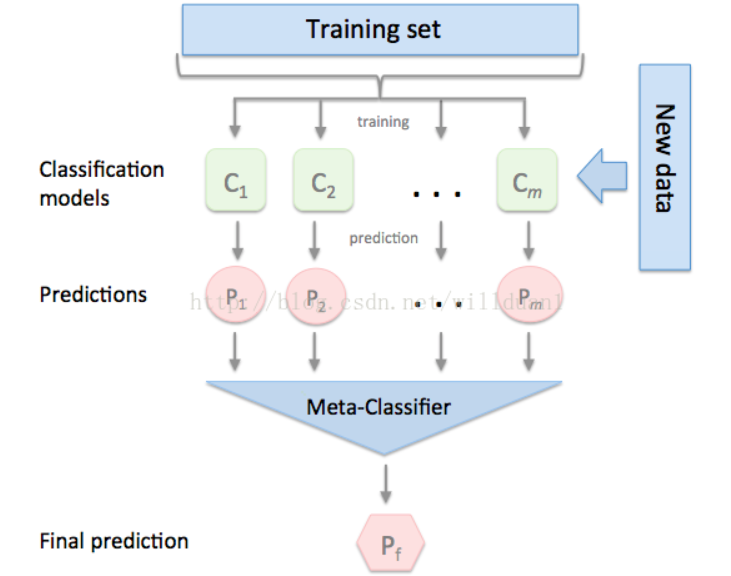

#### Bagging，Boosting二者之间的区别
- 样本选择上：
    - Bagging：训练集是在原始集中有放回选取的，从原始集中选出的各轮训练集之间是独立的。
    - Boosting：每一轮的训练集不变，只是训练集中每个样例在分类器中的权重发生变化。而权值是根据上一轮的分类结果进行调整。
- 样例权重：
    - Bagging：使用均匀取样，每个样例的权重相等
    - Boosting：根据错误率不断调整样例的权值，错误率越大则权重越大。
